<a href="https://colab.research.google.com/github/zjuiEMLab/rshub/blob/main/demo/Snow-demo-DMRT-BIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warning: limited LUT in DMRT-BIC. Please Use DMRT-TRI! Brightness temperature and backscatter of a three-layer snow scenario (DMRT-BIC)

In [1]:
import datetime
import numpy as np
!pip install rshub -q

In [ ]:
# Define user token
# Register your account to get a token https://rshub.zju.edu.cn/Registration
token = 'ENTER YOUR TOKEN HERE' # Register an account to get a token
# Change your task name or project name every time you run a new job
project_name = 'Demo'
task_name1 = 'DMRT-BIC Active'
task_name2 = 'DMRT-BIC Passive'

In [31]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 'soil': Bare soil
# 'snow': Snow
# 'veg': Vegetation covered soil
scenario_flag = 'snow'

# Step 2: Define observation description
# 1) Observation mode
# 'bs': Active (Backscatter)
# 'tb': Passive (Brightness temperature)
output_var1 = 'sigma'
output_var2 = 'tb'

# 2) Observation characteristics
fGHz = [10.2, 16.7]

# angle=[30, 40, 50] # Incident Angle
angle = np.arange(0,70,5)
angle = angle.tolist()


# Step 3: Define Algorithm flag
# 'qms': DMRT-QMS; 'bic': DMRT-BIC
algorithm = 'bic'

# Step 4: Describe your scenario (Demo shows 3-layer snow)
depth=[6, 2, 8] # [cm]
rho=[0.108,0.108,0.208] # [gmcc]
zp=[1.2,1.2,1.6] # control size distribution
kc=[7000,7500,5500] #inversely propotional to grain size [m^-1]
Tsnow=[260,262,265] # Snow temperature [K]

Tg=270 # Ground Temperature [K]
mv=0.2 # soil moisture
clayfrac=0.3 #clay fraction

# Passive parameters to calculate surface backscattering
rough_model = 'QH' # option 1: Q/H model; option 2: Wegmuller and Matzler 1999 model
rough_Q = 0.5  # polarization mixing factor, unitless          
rough_H = 0.5 # roughness height factor, unitless # Q = H = 0, means flat bottom surface     

surf_model_setting_passive=[rough_model,rough_Q,rough_H] #'OH'

# Active parameters to calculate surface backscattering
rough_model = "OH"    # option 1: 'NMM3D'; option 2: 'SPM3D'; option 3: 'OH'
rough_rms = 0.25 # rough ground rms height, (cm) rms == 0 assumes flat bottom boundary
rough_ratio = 7  # correlation length / rms height

surf_model_setting_active=[rough_model,rough_rms,rough_ratio] #'OH'

In [32]:
# Input data for Active DMRT-BIC model
data1 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var1,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'kc':kc,'zp':zp,'Tsnow':Tsnow,'Tg':Tg,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_active,
    'project_name':project_name,
    'task_name':task_name1,
    'token':token,
    'force_update_flag':1
}

# Input data for Passive DMRT-BIC model
data2 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var2,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'kc':kc,'zp':zp,'Tsnow':Tsnow,'Tg':Tg,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_passive,
    'project_name':project_name,
    'task_name':task_name2,
    'token':token,
    'force_update_flag':1
}

## Run models

In [33]:
from rshub import submit_jobs
# result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

{"scenario_flag": "snow", "output_var": "tb", "fGHz": [10.2, 16.7], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], "algorithm": "bic", "depth": [6, 2, 8], "rho": [0.108, 0.108, 0.208], "kc": [7000, 7500, 5500], "zp": [1.2, 1.2, 1.6], "Tsnow": [260, 262, 265], "Tg": 270, "mv": 0.2, "clayfrac": 0.3, "surf_model_setting": ["QH", 0.5, 0.5], "project_name": "Demo", "task_name": "DMRT-BIC Passive", "token": "0gv?7ov@oo8sc2ybig?owo!fl*##j4", "force_update_flag": 1}


In [23]:
print(result2['result'])

Job submitted!


In [24]:
print(result1['result'])

Job submitted!


In [6]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task_name1} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task_name2} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Check status of code

In [26]:
from rshub import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name2)
print(result)

{'task_status': 'completed', 'project_name': 'Demo', 'task_name': 'DMRT-BIC Passive'}


# Post Process

In [27]:
from rshub.load_files import load_file
# load mat file with project id, frequencies,variables to load

TB_v=[]
TB_h=[]
data = load_file(token, project_name, task_name2,scenario_flag=scenario_flag,algorithm=algorithm,output_var=output_var2)
params = data.load_parameters()
print(params)
for i,inc_ang in enumerate(angle):
    data_passive = data.load_outputs(fGHz = fGHz[0], inc_ang = inc_ang)
    # Read variables into python

    TB_v.append(data_passive['Tb_v0'][0]) # vertical Tbs
    TB_h.append(data_passive['Tb_h0'][0]) # horizontal Tbs
theta_obs = angle # incident angle

['Passive_fGHz10.2_ob_angle50.mat', 'Passive_fGHz10.2_ob_angle10.mat', 'Passive_fGHz16.7_ob_angle55.mat', 'Passive_fGHz10.2_ob_angle45.mat', 'Passive_fGHz16.7_ob_angle0.mat', 'Passive_fGHz10.2_ob_angle65.mat', 'Passive_fGHz10.2_ob_angle20.mat', 'Passive_fGHz16.7_ob_angle30.mat', 'Passive_fGHz16.7_ob_angle65.mat', 'Passive_fGHz16.7_ob_angle5.mat', 'Passive_fGHz16.7_ob_angle35.mat', 'Passive_fGHz10.2_ob_angle30.mat', 'Passive_fGHz16.7_ob_angle15.mat', 'Passive_fGHz10.2_ob_angle35.mat', 'Passive_fGHz10.2_ob_angle40.mat', 'Passive_fGHz10.2_ob_angle60.mat', 'Passive_fGHz16.7_ob_angle10.mat', 'Passive_fGHz16.7_ob_angle25.mat', 'Passive_fGHz16.7_ob_angle50.mat', 'Passive_fGHz10.2_ob_angle15.mat', 'Passive_fGHz10.2_ob_angle55.mat', 'Passive_fGHz16.7_ob_angle40.mat', 'Passive_fGHz10.2_ob_angle5.mat', 'Passive_fGHz16.7_ob_angle20.mat', 'Passive_fGHz16.7_ob_angle45.mat', 'Passive_fGHz10.2_ob_angle0.mat', 'Passive_fGHz10.2_ob_angle25.mat', 'Passive_fGHz16.7_ob_angle60.mat']
File size: 0.00 MB
File

In [30]:
# load mat file with project id, frequencies,variables to load

backscatter_vv=[]
backscatter_vh=[]
data1 = load_file(token, project_name, task_name1,scenario_flag=scenario_flag,algorithm=algorithm,output_var=output_var1)
for i,inc_ang in enumerate(angle):
    data_active = data1.load_outputs(fGHz = fGHz[0], inc_ang = inc_ang)
    # Read variables into python

    backscatter_vv.append(data_active['vvdb'][0]) # VV backscatters
    backscatter_vh.append(data_active['vhdb'][0]) # VH backscatters
theta_obs = angle # incident angle

['Active_fGHz10.2_ob_angle30.mat', 'Active_fGHz10.2_ob_angle65.mat', 'Active_fGHz10.2_ob_angle55.mat', 'Active_fGHz10.2_ob_angle5.mat', 'Active_fGHz16.7_ob_angle55.mat', 'Active_fGHz10.2_ob_angle15.mat', 'Active_fGHz16.7_ob_angle30.mat', 'Active_fGHz10.2_ob_angle25.mat', 'Active_fGHz10.2_ob_angle0.mat', 'Active_fGHz16.7_ob_angle60.mat', 'Active_fGHz10.2_ob_angle20.mat', 'Active_fGHz10.2_ob_angle35.mat', 'Active_fGHz16.7_ob_angle5.mat', 'Active_fGHz16.7_ob_angle15.mat', 'Active_fGHz16.7_ob_angle65.mat', 'Active_fGHz16.7_ob_angle35.mat', 'Active_fGHz16.7_ob_angle25.mat', 'Active_fGHz16.7_ob_angle10.mat', 'Active_fGHz16.7_ob_angle20.mat', 'Active_fGHz16.7_ob_angle45.mat', 'Active_fGHz10.2_ob_angle50.mat', 'Active_fGHz10.2_ob_angle60.mat', 'Active_fGHz16.7_ob_angle0.mat', 'Active_fGHz10.2_ob_angle10.mat', 'Active_fGHz10.2_ob_angle40.mat', 'Active_fGHz16.7_ob_angle50.mat', 'Active_fGHz10.2_ob_angle45.mat', 'Active_fGHz16.7_ob_angle40.mat']
File size: 0.00 MB
File is small (<= 50 MB), loadin

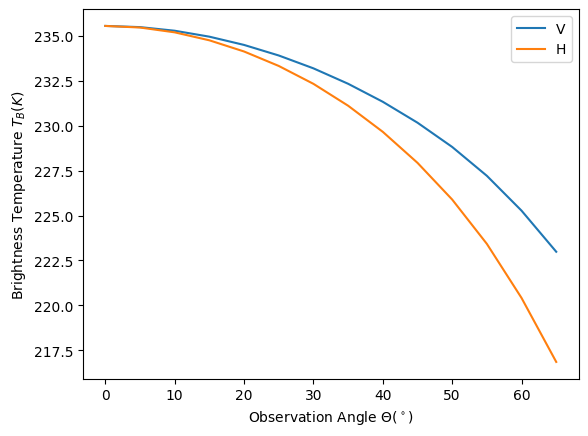

In [ ]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, TB_v, color='tab:blue')
ax.plot(theta_obs, TB_h, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['V', 'H'])

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

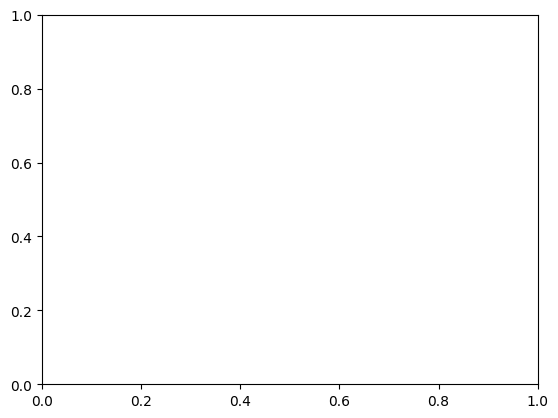

In [ ]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, backscatter_vh, color='tab:blue')
ax.plot(theta_obs, backscatter_vv, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Backscatter (dB)')
ax.legend(['VH', 'VV'])